## Plotting drifters on a map

Load the file drifters.csv, and plot the drifter positions (columns 'lon' and 'lat') on a map of the earth using a global projection of your choice. For this problem you can simply plot a (small) dot at each location

    [2 pts] Read in the file correctly
    [2 pts] Isolate and plot the data
    [2 pts] Create a map object with reasonable attributes
    [2 pts] Complete plot with drifter positions on the map


Hint: you may want to work with a subset of the data before you start plotting the entire thing. For example, if you create a dataframe called `df`, you may try to just plot the values associated with `df[:3000]` to only plot the first 3000 values.

In [1]:
#Reading in the drifters.csv file using pandas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drift  = pd.read_csv("C:\\Users\\rajak\\Documents\\Spring_2021\\OCNG_669\\Homeworks\\Assignment_06\\drifters.csv",header=0, parse_dates=[0], index_col=[3])
drift

,date,lon,lat
id,,,
59736,2005-11-22 03:00:00,11.778,37.491
59736,2005-11-22 06:00:00,11.779,37.520
59736,2005-11-22 09:00:00,11.794,37.453
59736,2005-11-23 00:00:00,11.730,37.398
59736,2005-11-23 03:00:00,11.682,37.358
...,...,...,...
49074,2011-08-04 03:00:00,164.701,39.538
49074,2011-08-04 06:00:00,164.720,39.541
49074,2011-08-04 09:00:00,164.760,39.541


In [2]:
#Not part of the homework.
print(drift.index.max(),drift.index.min())


59945 2613


In [3]:
#Not part of the homework.
list(drift.index)

[59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,
 59736,


In [4]:
#Not part of the homework. Initially planed to used grouped drifter numbers to get different colors. But then relaized
#there is a much easier way like we discussed in class.

sample_data = drift.groupby(by = drift.index)
len(sample_data.groups.keys())

645

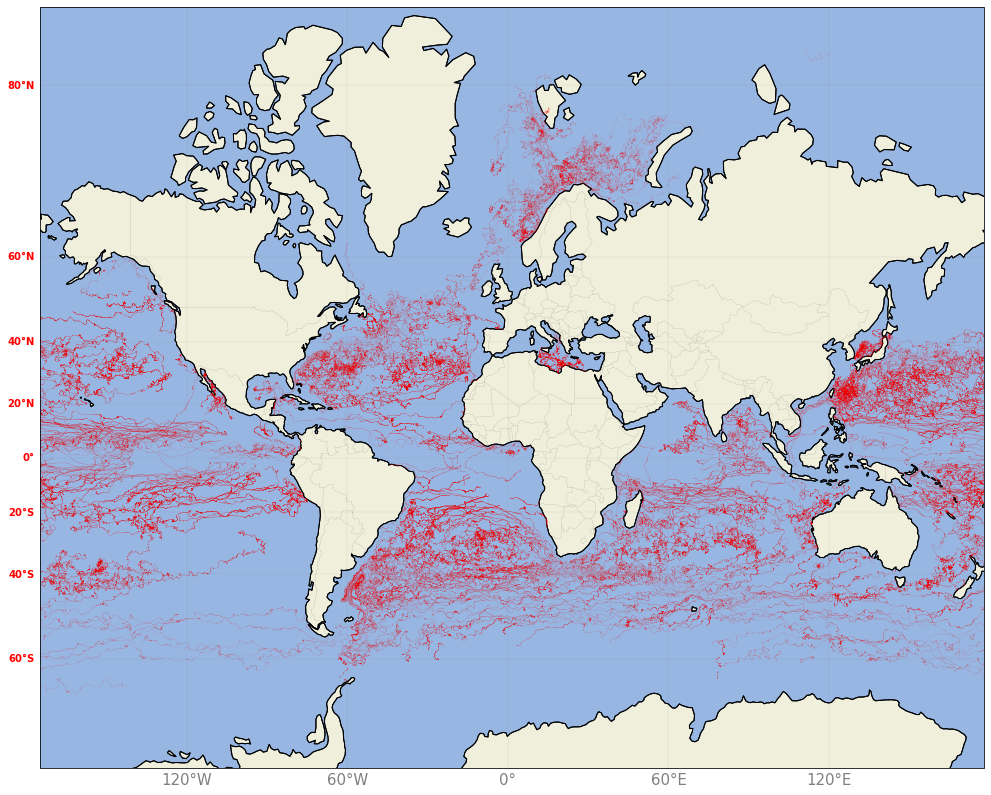

In [5]:
#Creating a World map using the PlateCarree projection.
import cartopy
import cartopy.crs as ccrs  # commonly used shorthand
import cartopy.feature as cfeature

fig = plt.figure(figsize=(18,14))
ax1 = plt.axes(projection=ccrs.Mercator())
ax1.set_extent([-175, 178, -75, 90], ccrs.PlateCarree())
#fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax1.coastlines(resolution='110m')
# add geographic information
ax1.add_feature(cartopy.feature.LAND)
ax1.add_feature(cartopy.feature.OCEAN)
ax1.coastlines(resolution='110m')  # looks better with resolution='10m'
ax1.add_feature(cartopy.feature.BORDERS, linestyle='--', lw=.1)

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
# the following two make the labels look like lat/lon format
gl = ax1.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}  # control how the tick labels look
gl.ylabel_style = {'color': 'red', 'weight': 'bold'}
gl.top_labels = False  # turn off labels where you don't want them
gl.right_labels = False

#Plotting the drifters on the world map.
ax1.plot(drift.lon, drift.lat,".",ms=0.025,c ="r",transform = ccrs.PlateCarree())

# Graduate student problem

Plot the drifters as before, but in this case:

 - Identify each of the individual tracks, with the number in the 'id' column
 - Plot each track using a unique (random) color. You can still use dots, as the problem of drifters wrapping around is difficult.


    [4 pts] Isolate each drifter
    [4 pts] Plot each drifter with a unique color


*Hint*: Again, you may want to test this with a smaller subset.

*Hint*: `groupby` objects have `groups` attributes, and `get_groups` methods. These might be useful.

In [6]:
#Not part of the homework. Initially planed to used grouped drifter numbers to get different colors. But then relaized
#there is a much easier way like we discussed in class.
sample_data.groups[2613]

Int64Index([2613, 2613, 2613, 2613, 2613, 2613, 2613, 2613, 2613, 2613,
            ...
            2613, 2613, 2613, 2613, 2613, 2613, 2613, 2613, 2613, 2613],
           dtype='int64', name='id', length=533)

In [7]:
#Not part of the homework. Initially planed to used grouped drifter numbers to get different colors. But then relaized
#there is a much easier way like we discussed in class.
sample_data.groups[2613]

Int64Index([2613, 2613, 2613, 2613, 2613, 2613, 2613, 2613, 2613, 2613,
            ...
            2613, 2613, 2613, 2613, 2613, 2613, 2613, 2613, 2613, 2613],
           dtype='int64', name='id', length=533)

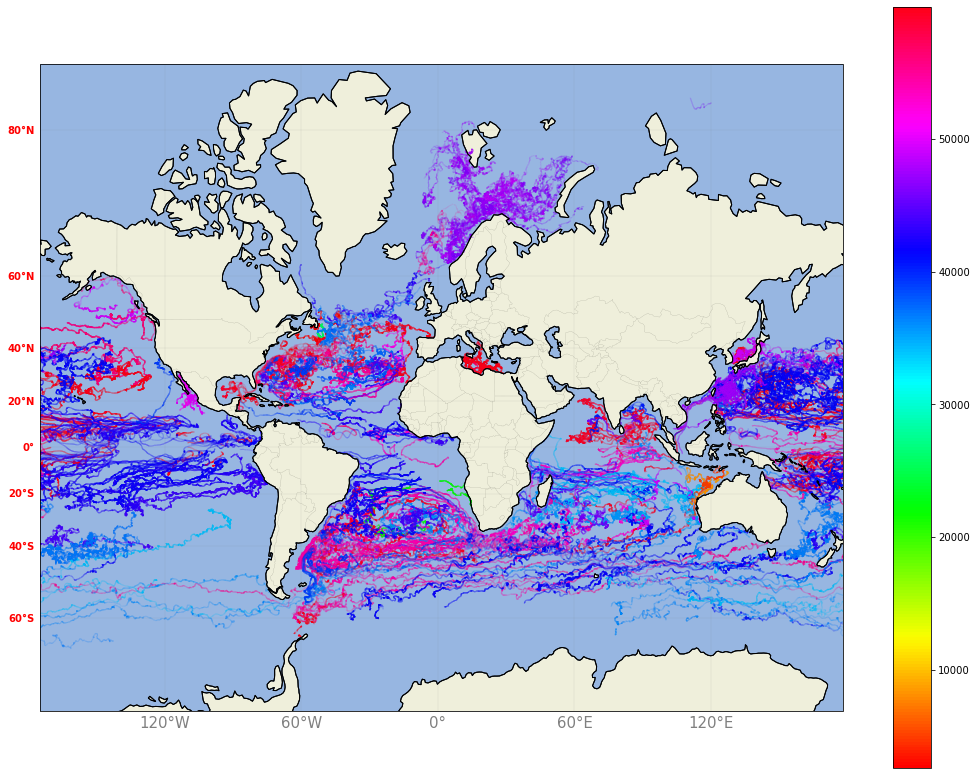

In [8]:
#Creating a World map using the PlateCarree projection.
import cartopy
import cartopy.crs as ccrs  # commonly used shorthand
import cartopy.feature as cfeature

fig = plt.figure(figsize=(18,14))
ax1 = plt.axes(projection=ccrs.Mercator())
ax1.set_extent([-175, 178, -75, 90], ccrs.PlateCarree())
#fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax1.coastlines(resolution='110m')
# add geographic information
ax1.add_feature(cartopy.feature.LAND)
ax1.add_feature(cartopy.feature.OCEAN)
ax1.coastlines(resolution='110m')  # looks better with resolution='10m'
ax1.add_feature(cartopy.feature.BORDERS, linestyle='--', lw=.1)

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
# the following two make the labels look like lat/lon format
gl = ax1.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}  # control how the tick labels look
gl.ylabel_style = {'color': 'red', 'weight': 'bold'}
gl.top_labels = False  # turn off labels where you don't want them
gl.right_labels = False

#Plotting each drifter with a different color.
ax1 = plt.scatter(drift.lon, drift.lat,marker = ".",s=0.01,c =list(drift.index),cmap='hsv',transform = ccrs.PlateCarree())
plt.colorbar()